C:\Users\valer\AppData\Local\Temp\ipykernel_26744\3495636271.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  spectrum = pd.read_csv(filename, delim_whitespace=True, header=None, names=["wavelength", "intensity"])


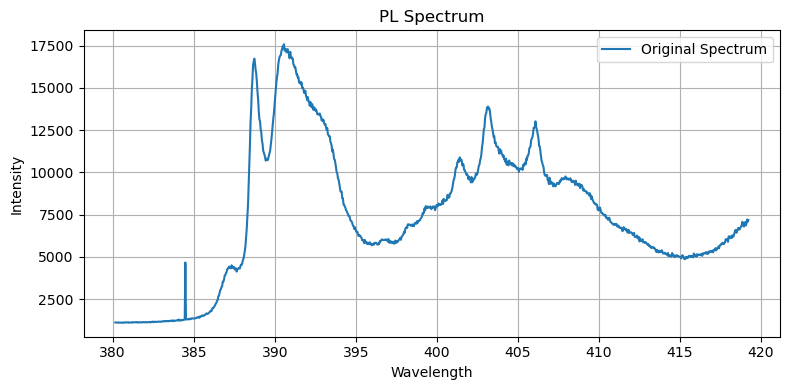

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace with your file name
filename = "Spectra_example.txt"

# Read the TXT file (assuming space/tab-separated, no header)
spectrum = pd.read_csv(filename, delim_whitespace=True, header=None, names=["wavelength", "intensity"])

# Plot it
plt.figure(figsize=(8, 4))
plt.plot(spectrum["wavelength"], spectrum["intensity"], label="Original Spectrum")
plt.xlabel("Wavelength")
plt.ylabel("Intensity")
plt.title("PL Spectrum")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [2]:
import numpy as np
from scipy.signal import medfilt

def remove_cosmic_rays(intensity, kernel_size=5, threshold=5):
    """
    Replace spikes with median-filtered values if they deviate beyond a threshold.
    """
    smoothed = medfilt(intensity, kernel_size=kernel_size)
    difference = np.abs(intensity - smoothed)
    std_dev = np.std(difference)

    # Detect spikes
    spikes = difference > (threshold * std_dev)

    # Replace spikes with smoothed values
    cleaned = intensity.copy()
    cleaned[spikes] = smoothed[spikes]
    
    return cleaned, spikes

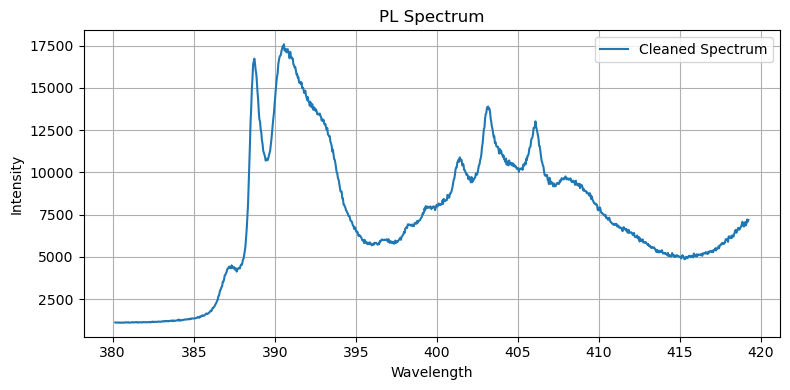

In [3]:
cleaned,spikes = remove_cosmic_rays(spectrum["intensity"])
plt.figure(figsize=(8, 4))
plt.plot(spectrum["wavelength"], cleaned, label="Cleaned Spectrum")
plt.xlabel("Wavelength")
plt.ylabel("Intensity")
plt.title("PL Spectrum")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()